In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

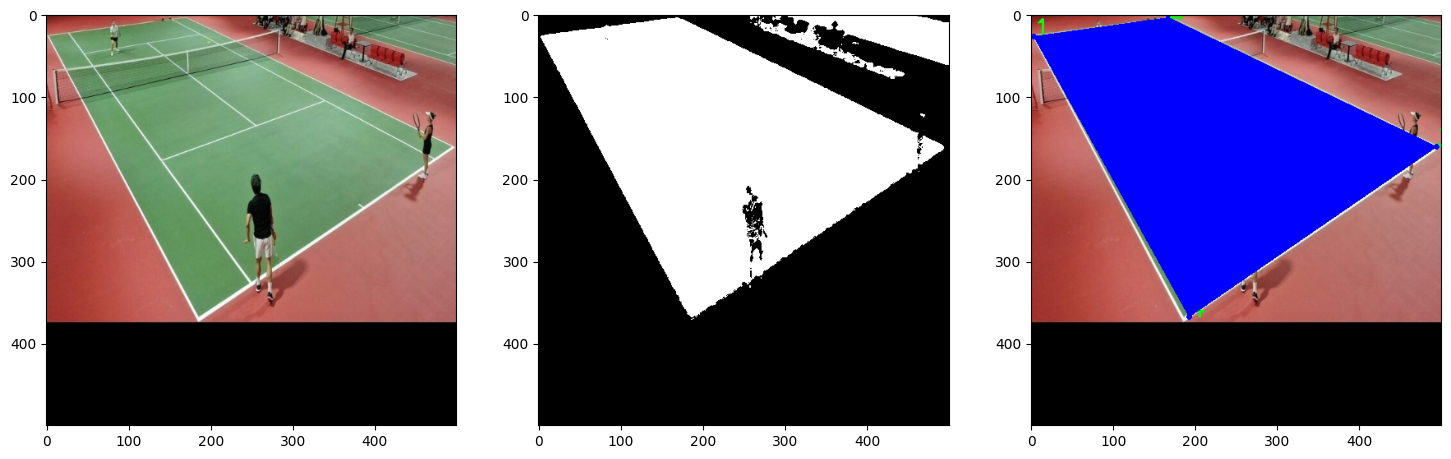

In [14]:
link_img = './datasets/images/train/tennis_court_16.JPG'


img = cv2.imread(link_img)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


lower_green = np.array([15, 10, 10]) 
upper_green = np.array([85, 255, 255])

mask_green = cv2.inRange(img_hsv, lower_green, upper_green)
contours, _ = cv2.findContours(mask_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


max_area = cv2.contourArea(contours[0])
cnt_f = contours[0]
for cnt in contours:
    if max_area < cv2.contourArea(cnt):
        max_area = cv2.contourArea(cnt)
        cnt_f = cnt
        x, y, w, h = cv2.boundingRect(cnt)


cnt_f = np.squeeze(cnt_f)
points = []


sorted_data = np.array(sorted(cnt_f, key=lambda x: (x[0])))
sorted_data2 = np.array(sorted(cnt_f, key=lambda x: (x[1])))


points.append(sorted_data[0])
points.append(sorted_data2[0])
points.append(sorted_data[-1])
points.append(sorted_data2[-1])

points = np.array(points)


for i, pt in enumerate(points, start=1):
    cv2.circle(img_rgb, pt, 2, (0, 0, 255), 2)
    cv2.putText(img_rgb, f'{i}', pt, cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.fillPoly(img_rgb, [points], (0, 0, 255))


# Show ouput

plt.figure(figsize=(18, 12))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(mask_green, cv2.COLOR_BGR2RGB), cmap='gray')

plt.subplot(1, 3, 3)
plt.imshow(img_rgb, cmap='gray')

plt.show()


In [135]:
import cv2
img_cp = img.copy()
height, width = 400, 260


out_point = [(0, 0), (width, 0), (width, height), (0, height)]
M = cv2.getPerspectiveTransform(np.float32(points), np.float32(out_point))
img_warp = cv2.warpPerspective(img, M, (width, height))

cv2.imshow("Image_BEV", img_warp)

def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:  
        print(f"Click chuột trái tại: ({x}, {y})")
        
        point_in_image = np.array([x, y, 1])
        point_in_bev = np.dot(M, point_in_image)
        x_bev = point_in_bev[0] / point_in_bev[2]
        y_bev = point_in_bev[1] / point_in_bev[2]
        cv2.circle(img_warp, (int(x_bev), int(y_bev)), 4, (0, 255, 0), cv2.FILLED) 
        
        cv2.circle(img_cp, (x, y), 4, (0, 255, 0), cv2.FILLED) 
        cv2.imshow("Image", img_cp)
        cv2.imshow("Image_BEV", img_warp)

cv2.imshow("Image", img)
cv2.setMouseCallback("Image", click_event)




cv2.waitKey(0)
cv2.destroyAllWindows()


Click chuột trái tại: (253, 137)
Click chuột trái tại: (138, 177)
Click chuột trái tại: (258, 204)
Click chuột trái tại: (172, 3)
Click chuột trái tại: (173, 8)
Click chuột trái tại: (1, 26)
Click chuột trái tại: (1, 28)
Click chuột trái tại: (493, 161)
Click chuột trái tại: (187, 367)
Click chuột trái tại: (173, 67)
Click chuột trái tại: (172, 46)
Click chuột trái tại: (227, 113)
Click chuột trái tại: (340, 106)
Click chuột trái tại: (47, 49)
Click chuột trái tại: (125, 35)
Click chuột trái tại: (188, 25)
Click chuột trái tại: (184, 26)
Click chuột trái tại: (177, 27)
Click chuột trái tại: (172, 28)
Click chuột trái tại: (166, 28)
Click chuột trái tại: (155, 34)
Click chuột trái tại: (148, 36)
Click chuột trái tại: (143, 39)
Click chuột trái tại: (140, 45)
Click chuột trái tại: (138, 50)
Click chuột trái tại: (136, 57)
Click chuột trái tại: (134, 68)
Click chuột trái tại: (133, 92)
Click chuột trái tại: (133, 103)
Click chuột trái tại: (135, 119)
Click chuột trái tại: (144, 137)
Click